In [3]:
# Importing Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import torch

In [4]:
df = pd.read_csv('HeartDisease.csv')
df.shape

(1025, 14)

In [5]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
target_count = df['target'].value_counts()
target_count

target
1    526
0    499
Name: count, dtype: int64

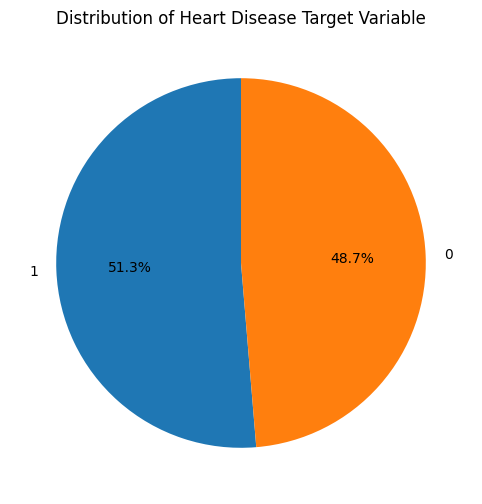

In [9]:
plt.figure(figsize=(8, 6))

plt.pie(target_count, labels=target_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Heart Disease Target Variable')
plt.show()

<hr>

In [10]:
# Splitting the dataset into training and testing sets
X = df.drop('target', axis=1)
Y = df['target']

print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (1025, 13)
Shape of Y: (1025,)


In [11]:
# Normalizing the data/features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.describe().round(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000
mean,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-2.805,-1.512,-0.916,-2.148,-2.327,-0.419,-1.004,-3.397,-0.712,-0.912,-2.244,-0.732,-3.746
25%,-0.710,-1.512,-0.916,-0.663,-0.679,-0.419,-1.004,-0.744,-0.712,-0.912,-0.624,-0.732,-0.522
50%,0.173,0.662,0.056,-0.092,-0.116,-0.419,0.891,0.126,-0.712,-0.231,-0.624,-0.732,-0.522
75%,0.724,0.662,1.028,0.479,0.562,-0.419,0.891,0.734,1.404,0.620,0.995,0.239,1.090
max,2.489,0.662,1.999,3.906,6.167,2.387,2.787,2.300,1.404,4.367,0.995,3.150,1.090


In [13]:
# Splitting the dataset into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

In [14]:
print("Training set shape:", X_train.shape, Y_train.shape)
print("Validation set shape:", X_val.shape, Y_val.shape)

Training set shape: (717, 13) (717,)
Validation set shape: (308, 13) (308,)


<hr>

<h2><b>Building the MLP</b></h2>

In [15]:
# Converting data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train.values, dtype=torch.float32).unsqueeze(1)

X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
Y_val_tensor = torch.tensor(Y_val.values, dtype=torch.float32).unsqueeze(1)

In [16]:
# Dataset
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, Y_train_tensor)
val_dataset = torch.utils.data.TensorDataset(X_val_tensor, Y_val_tensor)

# Data Loader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32)

In [19]:
# Defining the Model

model = torch.nn.Sequential(
    torch.nn.Linear(13, 16),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.2),

    torch.nn.Linear(16, 8),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.2),

    torch.nn.Linear(8, 1),
    torch.nn.Sigmoid()
)

print(model)

Sequential(
  (0): Linear(in_features=13, out_features=16, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.2, inplace=False)
  (3): Linear(in_features=16, out_features=8, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.2, inplace=False)
  (6): Linear(in_features=8, out_features=1, bias=True)
  (7): Sigmoid()
)


In [20]:
criterion = torch.nn.BCELoss()  # Binary Cross Entroy Loss 
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Training the model
num_epochs = 250
train_acc_list = []
val_acc_list = []
train_loss_list = []
val_loss_list = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0

    for inputs, labels in train_loader: 
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        predicted = (outputs > 0.5).float()
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader.dataset)
    train_acc = correct / len(train_loader.dataset)

    model.eval()
    val_loss = 0.0
    val_correct = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            val_loss += loss.item() * inputs.size(0)
            predicted = (outputs > 0.5).float()
            val_correct += (predicted == labels).sum().item()

        val_loss = val_loss / len(val_loader.dataset)
        val_acc = val_correct / len(val_loader.dataset)

        train_loss_list.append(train_loss)
        val_loss_list.append(val_loss)
        train_acc_list.append(train_acc)
        val_acc_list.append(val_acc)

        if (epoch+1) % 25 == 0 or epoch == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}] Train Loss: {train_loss:.4f}, Acc: {train_acc:.4f} | Val Loss: {val_loss:.4f}, Acc: {val_acc:.4f}')

Epoch [1/250] Train Loss: 0.6928, Acc: 0.5077 | Val Loss: 0.6800, Acc: 0.5942
Epoch [25/250] Train Loss: 0.3248, Acc: 0.8675 | Val Loss: 0.3576, Acc: 0.8214
Epoch [50/250] Train Loss: 0.2934, Acc: 0.8982 | Val Loss: 0.3414, Acc: 0.8506
Epoch [75/250] Train Loss: 0.2452, Acc: 0.9010 | Val Loss: 0.3062, Acc: 0.8571
Epoch [100/250] Train Loss: 0.2280, Acc: 0.9177 | Val Loss: 0.2768, Acc: 0.8669
Epoch [125/250] Train Loss: 0.1980, Acc: 0.9247 | Val Loss: 0.2448, Acc: 0.8734
Epoch [150/250] Train Loss: 0.1982, Acc: 0.9191 | Val Loss: 0.2190, Acc: 0.9026
Epoch [175/250] Train Loss: 0.1607, Acc: 0.9456 | Val Loss: 0.2066, Acc: 0.9188
Epoch [200/250] Train Loss: 0.1896, Acc: 0.9289 | Val Loss: 0.2022, Acc: 0.9253
Epoch [225/250] Train Loss: 0.1534, Acc: 0.9470 | Val Loss: 0.1839, Acc: 0.9318
Epoch [250/250] Train Loss: 0.1662, Acc: 0.9456 | Val Loss: 0.1700, Acc: 0.9383


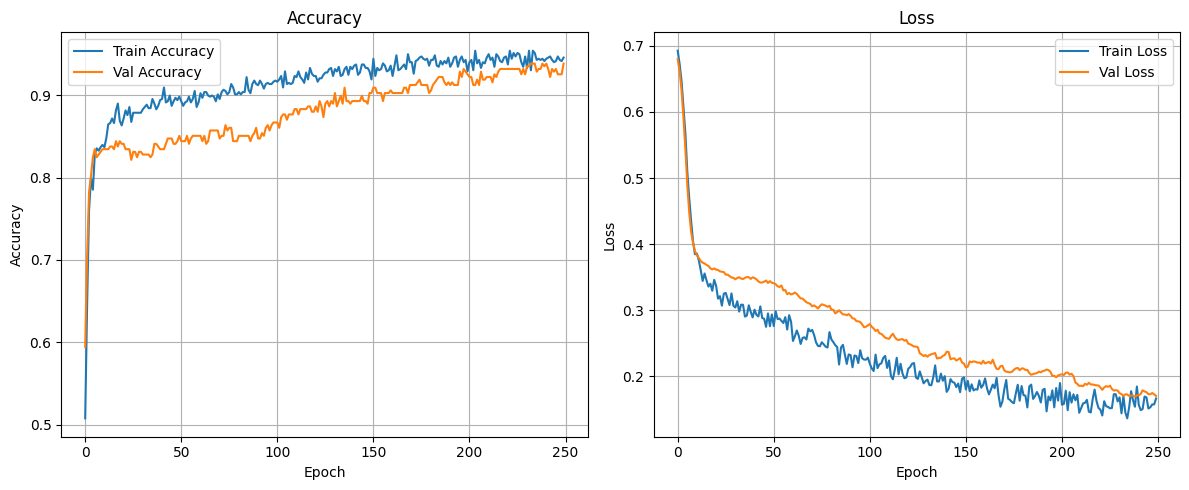

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Accuracy
axs[0].plot(train_acc_list, label='Train Accuracy')
axs[0].plot(val_acc_list, label='Val Accuracy')
axs[0].set_title('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
axs[0].grid(True)

# Loss
axs[1].plot(train_loss_list, label='Train Loss')
axs[1].plot(val_loss_list, label='Val Loss')
axs[1].set_title('Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

<hr>

## <b>Sample Prediction</b>

In [35]:
sample = np.array([[52,1,0,128,204,1,1,196,1,1,0.5,0,0]])  # Example input
sample_normalized = scaler.transform(sample)  

sample_tensor = torch.tensor(sample_normalized, dtype=torch.float32).unsqueeze(0)

# Running the model and making the prediction
model.eval()
with torch.no_grad():
    prediction = model(sample_tensor)

print(prediction)

tensor([[[0.7791]]])


c:\Users\Abdul Rehman Tahir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [36]:
if(prediction.item() > 0.5):
    print("Have Heart Disease")
else:
    print("No Heart Disease")

Have Heart Disease


<hr>

In [43]:
print(X_train)
type(X_train)


[[ 0.50352033  0.66150409  0.05593123 ...  0.99543334 -0.73197147
  -0.52212231]
 [ 0.39324077  0.66150409 -0.91575542 ... -0.6241209   2.17981673
   1.08985168]
 [-1.15067305 -1.51170646  1.02761788 ... -0.6241209   0.23862459
  -0.52212231]
 ...
 [-0.37871614  0.66150409 -0.91575542 ...  0.99543334 -0.73197147
   1.08985168]
 [-1.26095261  0.66150409 -0.91575542 ...  0.99543334 -0.73197147
   1.08985168]
 [-0.26843658  0.66150409 -0.91575542 ...  0.99543334  0.23862459
  -0.52212231]]


numpy.ndarray

In [44]:
print(X_train_tensor)
type(X_train_tensor)

tensor([[ 0.5035,  0.6615,  0.0559,  ...,  0.9954, -0.7320, -0.5221],
        [ 0.3932,  0.6615, -0.9158,  ..., -0.6241,  2.1798,  1.0899],
        [-1.1507, -1.5117,  1.0276,  ..., -0.6241,  0.2386, -0.5221],
        ...,
        [-0.3787,  0.6615, -0.9158,  ...,  0.9954, -0.7320,  1.0899],
        [-1.2610,  0.6615, -0.9158,  ...,  0.9954, -0.7320,  1.0899],
        [-0.2684,  0.6615, -0.9158,  ...,  0.9954,  0.2386, -0.5221]])


torch.Tensor

This shows that the tensor is just another data type. To feed data in the torch model, we first have to convert the numpy array into tensor.

In [48]:
print(train_dataset)
type(train_dataset)

torch.utils.data.dataset.TensorDataset

In [49]:
print(train_loader)
type(train_loader)

torch.utils.data.dataloader.DataLoader